### Student Name: Rania Siddiqui
### Student ID: 07494
### Student Email: rs07494@st.habib.edu.pk

#### **Objectives**
This exam has two main objectives to achieve:
* Explore the heart disease dataset using exploratory data analysis (EDA)
* Exercise with Machine Learing Classification algorithms for prediction (modeling)
---

**Instructions for Data Cleaning and Wrangling**:

* rows that have value `ca = 4` is incorrect. In the original dataset they are NaNs.
* rows that have value `thal = 0` is also incorrect. They are also NaNs in the original dataset.

**Action**:  Drop the incorrect rows above. Please report the total number of rows **before and after** cleaning for verification.

---

**Instructions for Exploratory Data Analysis**:

* your target/class column is `heart_disease`
* 3 exploratory data analysis (EDA) and visualization for `Only Numerical Features`. Use different EDA methods and visualization types (example: density/distribution plot, scatter plot, correlation plot etc). Use different combination of columns/features.
* 3 exploratory data analysis (EDA) and visualization for `Categorical Features Only (or pair of numerical/categorical columns)`. Use different EDA methods and visualization types (example: count distribution plot, group by table, box plot etc). Use different combination of columns/features. For categorical column, you can also use target/class column.

**Action**:  For each EDA result/visualization, briefly explain the insights. **EDA without explanation will not be accepted.**

---

**Instructions for Machine Learning**:

* your target/class column is `heart_disease`
* build 2 different machine learning models for classification. Use encoding when needed.
* you can use any of the classification alorithms from the sklearn libarary such as `Logistic Regression`, `Nearest Neighbors`, `Support Vectors`, `Nu SVC`, `Decision Tree`, `Random Forest`, `AdaBoost`, `Gradient Boosting`, `Naive Bayes`, `Linear Discriminant Analysis`, `Quadratic Discriminant Analysis` and `Neural Net`.
* use classification accuracy, precision, recall and confusion matrix to evaluate models and compare them.

**Action**:  Briefly compare the above machine learning models. **Results without explanation will not be accepted.**

---

**Instructions for Improving Machine Learning model**:

* pick any of the above machine learning model and try to improve the classification accuracy
* you can apply any method such as pruning, feature selection (using only important features) or any parameter tuning to improve the model.

**Action**:  Briefly explain your approach and discuss if it improves the classification accuracy. **Results without explanation will not be accepted.**

---

In [1]:


import pandas as pd
import numpy as np

from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trest_blood_pressure,chol,fasting_blood_sugar,rest_ecg,thal_ach,exang,old_peak,slope,ca,thal,heart_disease
0,63,male,3,145,233,high,0,150,0,2.3,0,0,1,yes
1,37,male,2,130,250,normal,1,187,0,3.5,0,0,2,yes
2,41,female,1,130,204,normal,0,172,0,1.4,2,0,2,yes
3,56,male,1,120,236,normal,1,178,0,0.8,2,0,2,yes
4,57,female,0,120,354,normal,1,163,1,0.6,2,0,2,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    int64  
 1   sex                   303 non-null    object 
 2   cp                    303 non-null    int64  
 3   trest_blood_pressure  303 non-null    int64  
 4   chol                  303 non-null    int64  
 5   fasting_blood_sugar   303 non-null    object 
 6   rest_ecg              303 non-null    int64  
 7   thal_ach              303 non-null    int64  
 8   exang                 303 non-null    int64  
 9   old_peak              303 non-null    float64
 10  slope                 303 non-null    int64  
 11  ca                    303 non-null    int64  
 12  thal                  303 non-null    int64  
 13  heart_disease         303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trest_blood_pressure,0
chol,0
fasting_blood_sugar,0
rest_ecg,0
thal_ach,0
exang,0
old_peak,0


Data Cleaning and Wrangling

In [9]:
initial_rows = len(df)
print(f"Total number of rows before cleaning: {initial_rows}")

Total number of rows before cleaning: 303


Dropping incorrect rows

In [10]:
# Drop rows where 'ca' is 4
df = df[df['ca'] != 4]

# Drop rows where 'thal' is 0
df = df[df['thal'] != 0]

Getting Final Number of rows

In [11]:
final_rows = len(df)
print(f"Total number of rows after cleaning: {final_rows}")

Total number of rows after cleaning: 296


Exploratory Data Anaylysis EDA

Numerical Features EDA

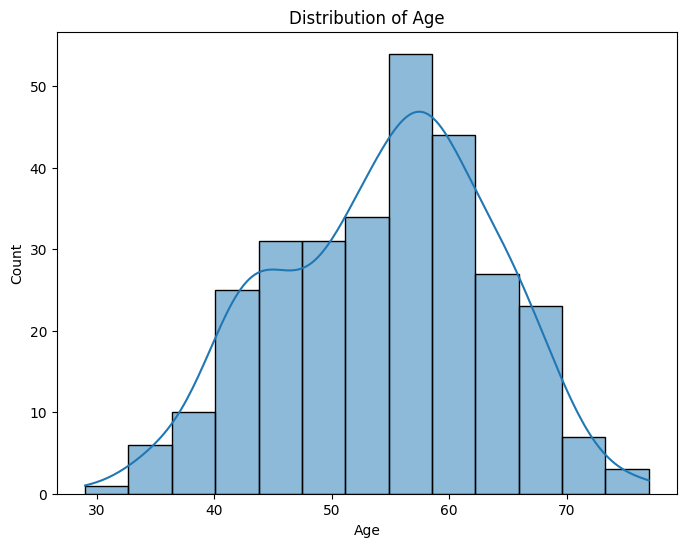

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insight: The above plot shows the distribution of age among patients. It helps to understand the age range of the patients and if there are any specific age groups that are more prone to heart diseases.

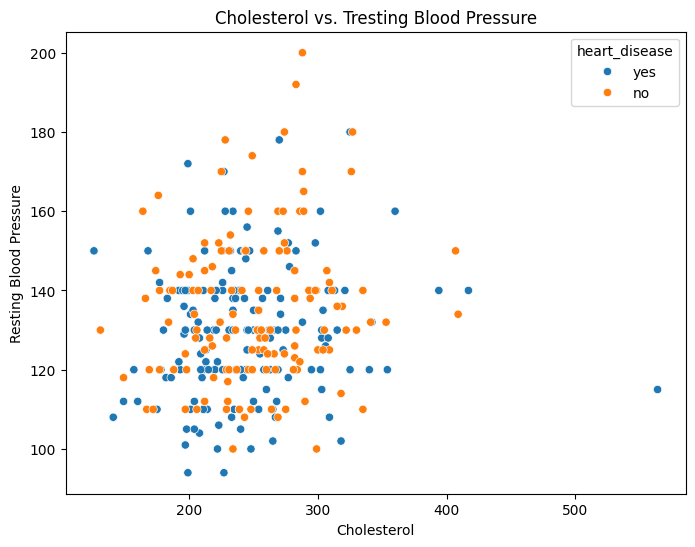

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chol', y='trest_blood_pressure', data=df, hue='heart_disease')
plt.title('Cholesterol vs. Tresting Blood Pressure')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.show()

Insight: This scatter plot explores the relationship between cholesterol levels and Tresting blood pressure. The color coding based on heart disease helps to see if there are any patterns or clusters among patients with and without heart disease.

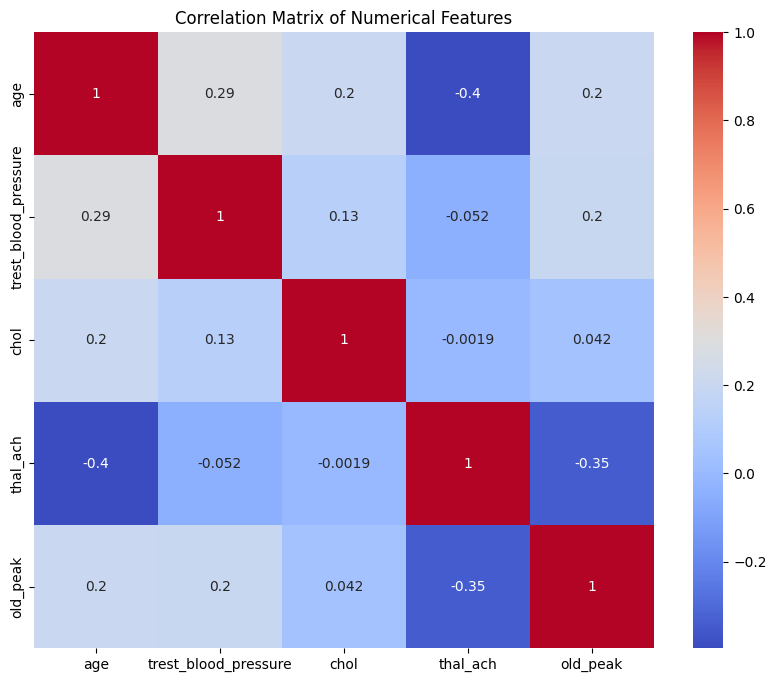

In [17]:
numerical_features = ['age', 'trest_blood_pressure', 'chol', 'thal_ach', 'old_peak']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Insight: This above correlation matrix visualizes the relationships between different numerical features. It helps to identify features that are strongly correlated with each other, which can be useful for feature selection in modeling.


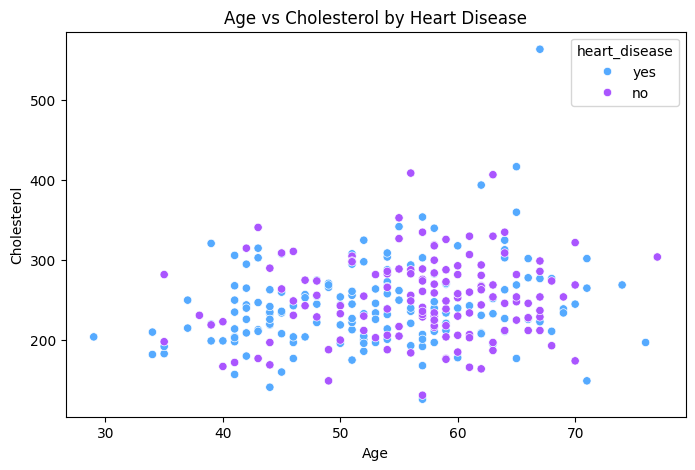

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['chol'], hue=df['heart_disease'], palette='cool')
plt.title("Age vs Cholesterol by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


Insight: Cholesterol levels vary with age, but higher levels may be more common in older patients.


Categorical Features EDA

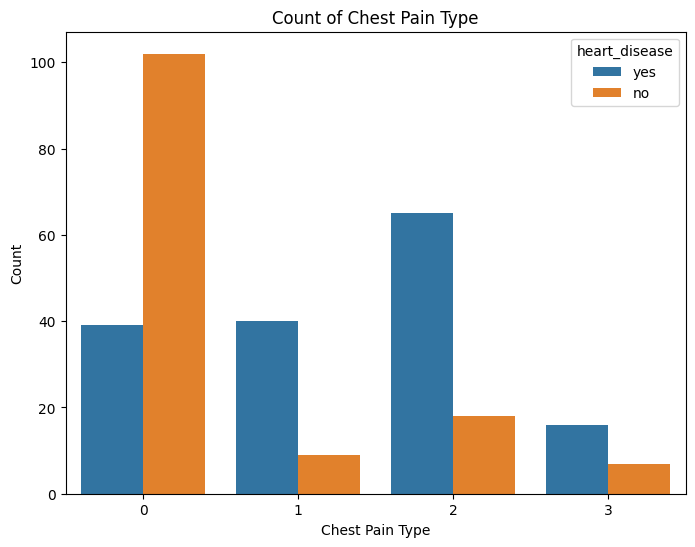

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df, hue='heart_disease')
plt.title('Count of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

Insight: This plot shows the distribution of different chest pain types among patients. The color coding helps to understand the prevalence of heart disease for each type of chest pain.


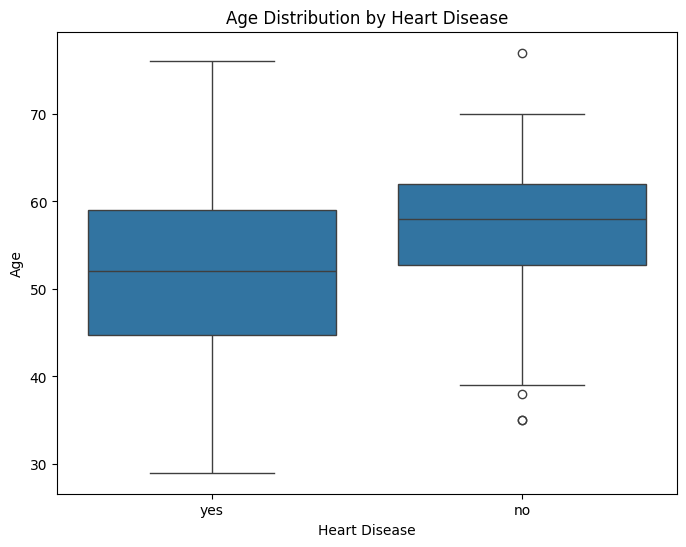

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

 Insight: The box plot compares the age distributions between patients with and without heart disease. It helps to see if there are any significant differences in age between the two groups.

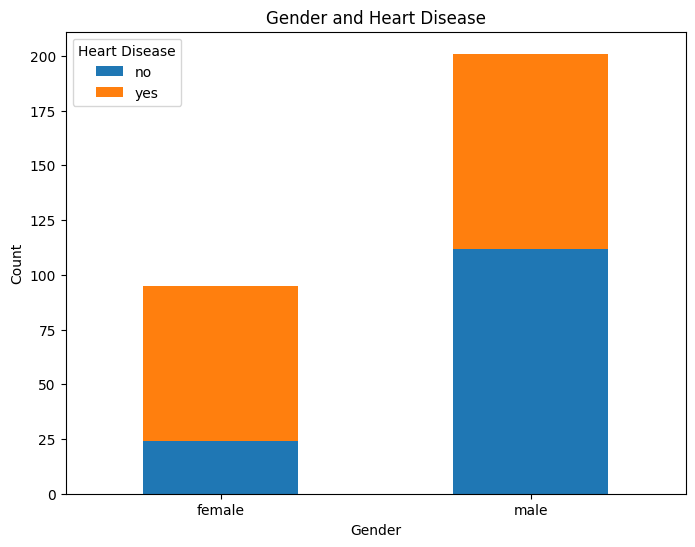

In [21]:
gender_heart_disease = df.groupby(['sex', 'heart_disease'])['heart_disease'].count().unstack()
gender_heart_disease.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Gender and Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

 Insight: This grouped bar chart shows the distribution of heart disease among different genders. It helps to understand if there is any association between gender and the likelihood of heart disease.

Machine Learning

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [59]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

In [60]:
X = pd.get_dummies(X, columns=['sex', 'cp', 'fasting_blood_sugar', 'rest_ecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [62]:
model_lr = LogisticRegression(max_iter=1000)  # Increased max_iter
model_lr.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)*100
precision_lr = precision_score(y_test, y_pred_lr, pos_label='yes')  # Specify 'yes' as the positive label
recall_lr = recall_score(y_test, y_pred_lr, pos_label='yes')  # Specify 'yes' as the positive label

# Print evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

Logistic Regression:
Accuracy: 86.5169
Precision: 0.8571
Recall: 0.8936
Confusion Matrix:
 [[35  7]
 [ 5 42]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from sklearn.ensemble import RandomForestClassifier


# 3. Model Training
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# 4. Model Evaluation
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
precision_rf = precision_score(y_test, y_pred_rf, pos_label = 'yes')
recall_rf = recall_score(y_test, y_pred_rf, pos_label = 'yes')

# Print evaluation metrics
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)


Random Forest:
Accuracy: 80.8989
Precision: 0.8571
Recall: 0.7660
Confusion Matrix:
 [[36  6]
 [11 36]]


Logistic Regression is a linear model, while random forest is an ensemble learning method that combines multiple decision trees to make predictions.

By comparing the two models, logistic regression and linear forest, logistic regression has a better classification accuracy than random forest. The precison and recall of logistic regression model is also better than the random forest. In my case, logistic regression model has performed better than random forest model.

Improving the Model

Method 1

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
for n_estimators in range(5, 50, 5):
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=100)
    forestModel = forest.fit(X_train, y_train)

    pred_train = forestModel.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train) * 100

    pred_test = forestModel.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test) * 100

    print('Number of Trees: {}, Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(n_estimators, train_acc, test_acc))

Number of Trees: 5, Training Accuracy: 98.73, Testing Accuracy: 75.00
Number of Trees: 10, Training Accuracy: 100.00, Testing Accuracy: 83.33
Number of Trees: 15, Training Accuracy: 99.58, Testing Accuracy: 81.67
Number of Trees: 20, Training Accuracy: 100.00, Testing Accuracy: 76.67
Number of Trees: 25, Training Accuracy: 100.00, Testing Accuracy: 80.00
Number of Trees: 30, Training Accuracy: 100.00, Testing Accuracy: 80.00
Number of Trees: 35, Training Accuracy: 100.00, Testing Accuracy: 76.67
Number of Trees: 40, Training Accuracy: 100.00, Testing Accuracy: 78.33
Number of Trees: 45, Training Accuracy: 100.00, Testing Accuracy: 80.00


In [66]:
rf = RandomForestClassifier(n_estimators=10)
rfmodel = rf.fit(X_train, y_train)

pred_train = rfmodel.predict(X_train)
train_acc = accuracy_score(y_train, pred_train) * 100

pred_test = rfmodel.predict(X_test)
test_acc = accuracy_score(y_test, pred_test) * 100

print(' Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format( train_acc, test_acc))

 Training Accuracy: 97.46, Testing Accuracy: 85.00


Second Method I have tried since this gives a different n_estimator so i have pruned my model accordingly.

In [57]:
best_n_estimators = 0
best_test_acc = 0

for n_estimators in range(5, 50, 5):
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=99)
    forestModel = forest.fit(X_train, y_train)

    pred_train = forestModel.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train) * 100

    pred_test = forestModel.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test)*100

    print('Number of Trees: {}, Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(n_estimators, train_acc, test_acc))

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_n_estimators = n_estimators


final_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=99)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)*100

print("\nBest Number of Trees:", best_n_estimators)
print("Final Accuracy:", final_accuracy)

Number of Trees: 5, Training Accuracy: 96.19, Testing Accuracy: 81.67
Number of Trees: 10, Training Accuracy: 99.15, Testing Accuracy: 83.33
Number of Trees: 15, Training Accuracy: 99.58, Testing Accuracy: 83.33
Number of Trees: 20, Training Accuracy: 99.58, Testing Accuracy: 85.00
Number of Trees: 25, Training Accuracy: 99.58, Testing Accuracy: 85.00
Number of Trees: 30, Training Accuracy: 100.00, Testing Accuracy: 85.00
Number of Trees: 35, Training Accuracy: 99.58, Testing Accuracy: 85.00
Number of Trees: 40, Training Accuracy: 100.00, Testing Accuracy: 85.00
Number of Trees: 45, Training Accuracy: 100.00, Testing Accuracy: 86.67

Best Number of Trees: 45
Final Accuracy: 86.66666666666667


Discussion:
By systematically varying the number of trees and selecting the best value based on testing accuracy, this approach aims to prevent overfitting and improve the model's generalization performance. As evident, when i pruned the model using random forest, the accuracy improved from 80.89% to 86.66%. Using the optimal n_estimators, it helped me choose the best n_estimators and then eventually run my model. So yes the classification accuracy did improve.

Plotting the important features

Text(0.5, 0, 'Random Forest Feature Importance')

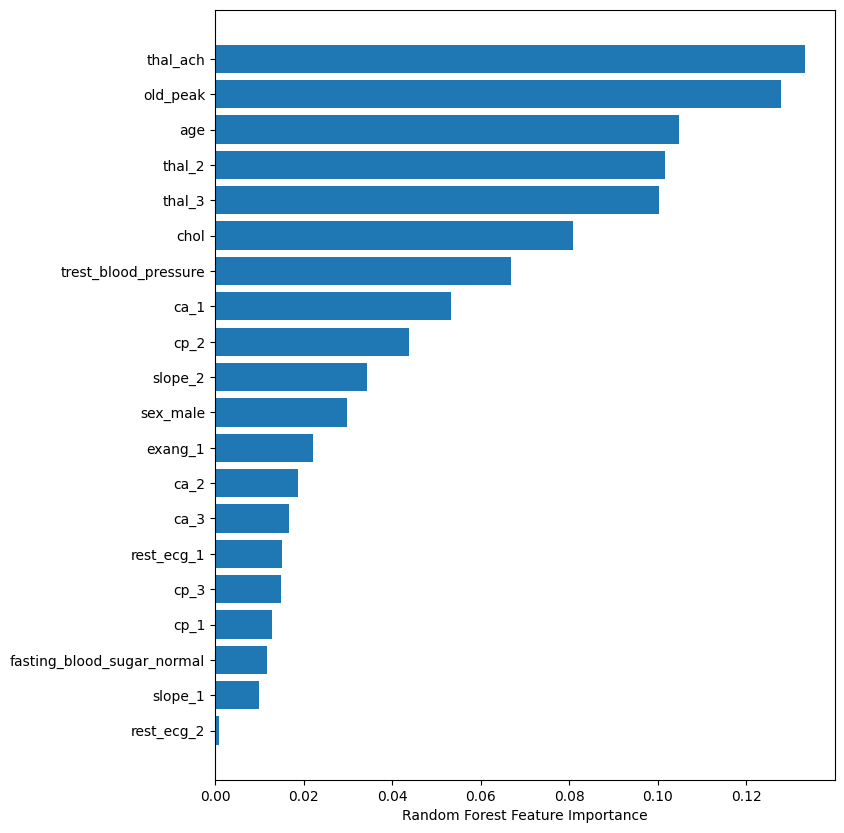

In [72]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.figure(figsize=(8,10))
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Discussion:
The bar chart illustrates the significance of each important feature in the model. From this bar chart, we can observe that features like thal_ach , old_peak, age are very important features, and features like fasting_blood_sugar_normal, cp1, slope etc are less important.